# Dataton CDMX

In [2]:
# Clase para importar desde API
from mariachis._base import BaseClass

# Control de datos
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 100)

# Visualizaciones
import matplotlib.pyplot as plt
import plotly.express as px

# Modelos
from prophet import Prophet

## Línea Mujeres

In [6]:
to_import = BaseClass('','Linea_mujeres')
aux = to_import.full_import(resource_id='43bc1889-4e63-48c8-b67c-8b0dc842b5c5', api_export=False)
# El límite de la API son 32K registros, se opta por importar via .csv
aux.sample()

Archivo importado desde:
https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=43bc1889-4e63-48c8-b67c-8b0dc842b5c5&distinct=true&limit=32000
Con 32000 renglones y 29 columnas


,_id,FOLIO,FECHA_ALTA,ANO_ALTA,MES_ALTA,DIA_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,ESCOLARIDAD,ESTADO_USUARIA,MUNICIPIO_USUARIA,COLONIA_USUARIA,CP_USUARIA,ESTADO_HECHOS,MUNICIPIO_HECHOS,COLONIA_HECHOS,CP_HECHOS,ORIGEN,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7
31751,31752,54017,2017-03-11T00:00:00,2017,3,11,16,FEMENINO,40,SOLTERO (A),DESEMPLEADO (A),SECUNDARIA,ESTADO DE MÉXICO,ECATEPEC DE MORELOS,VILLAS DE GUADALUPE XALOSTOC,55339,ESTADO DE MÉXICO,ECATEPEC DE MORELOS,VILLAS DE GUADALUPE XALOSTOC,55339,ASESORÍA,JURÍDICO,LABORAL,TERMINACION DE LA RELACION LABORAL,DESPIDO INJUSTIFICADO,INDEMNIZACIÓN/REINSTALACIÓN,NA,NA,NA


In [ ]:
linea = pd.read_csv('linea-mujeres-1116-021120.csv', encoding='latin')

# Formato de texto para el FOLIO.
linea['FOLIO'] = linea['FOLIO'].astype('int').astype('str')

# Transformar la columna de FECHA_ALTA en formato fecha.
linea['FECHA_ALTA'] = pd.to_datetime(linea['FECHA_ALTA'])
# Obtener la semana de la fecha.
linea.insert(3, "SEMANA_ALTA", linea['FECHA_ALTA'].dt.isocalendar().week , True)
linea.insert(3, "FECHA", pd.to_datetime(linea.SEMANA_ALTA.astype(str) + linea.AÑO_ALTA.astype(str).add('-7'), format = "%V%G-%u") , True)

#Obtener el día de la semana
linea.insert(4, "DIA_SEMANA",  linea['FECHA_ALTA'].dt.dayofweek)

print(linea.shape)
linea.tail()

(501833, 31)


,FOLIO,FECHA_ALTA,AÑO_ALTA,FECHA,DIA_SEMANA,SEMANA_ALTA,MES_ALTA,DÍA_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,ESCOLARIDAD,ESTADO_USUARIA,MUNICIPIO_USUARIA,COLONIA_USUARIA,CP_USUARIA,ESTADO_HECHOS,MUNICIPIO_HECHOS,COLONIA_HECHOS,CP_HECHOS,ORIGEN,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7
501828,809049,2020-11-01,2020,2020-11-01,6,44,11,1,23,FEMENINO,31,CASADO (A),HOGAR,LICENCIATURA,CIUDAD DE MÉXICO,ÁLVARO OBREGÓN,COLINA DEL SUR,1430.0,CIUDAD DE MÉXICO,ÁLVARO OBREGÓN,COLINA DEL SUR,1430.0,NÚMERO 911,MÉDICO,ENDOCRINOLOGIAS,HIPOGLICEMIA,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS
501829,809052,2020-11-01,2020,2020-11-01,6,44,11,1,23,FEMENINO,38,CASADO (A),EMPLEADO (A),LICENCIATURA,CIUDAD DE MÉXICO,IZTAPALAPA,GRANJAS DE SAN ANTONIO,9070.0,CIUDAD DE MÉXICO,IZTAPALAPA,GRANJAS DE SAN ANTONIO,9070.0,ASESORÍA,MÉDICO,NEUROLOGIA,SINDROME VERTIGINOSO,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS
501830,809054,2020-11-01,2020,2020-11-01,6,44,11,1,23,FEMENINO,26,UNIÓN LIBRE,TRABAJO INDEPENDIENTE,LICENCIATURA,CIUDAD DE MÉXICO,BENITO JUÁREZ,ERMITA,3590.0,NaN,NaN,NaN,NaN,ASESORÍA,PSICOLÓGICO,VIOLENCIA,DE GÉNERO,FAMILIAR,FÍSICA,POR PARTE DE LA PAREJA,ENFRENTAR VIOLENCIA,NaN
501831,809055,2020-11-01,2020,2020-11-01,6,44,11,1,23,FEMENINO,62,SOLTERO (A),EMPLEADO (A),SECUNDARIA,CIUDAD DE MÉXICO,IZTAPALAPA,SAN LORENZO TEZONCO,9790.0,CIUDAD DE MÉXICO,IZTAPALAPA,SAN LORENZO TEZONCO,9790.0,ASESORÍA,MÉDICO,MEDICAMENTOS,ANTIBIOTICOS,TIPO DE PREESCRIPCION,POR MEDICO,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS,URGENCIAS Y EMERGENCIAS
501832,809056,2020-11-01,2020,2020-11-01,6,44,11,1,23,FEMENINO,36,SOLTERO (A),HOGAR,BACHILLERATO,CIUDAD DE MÉXICO,AZCAPOTZALCO,CLAVERÍA,2080.0,NaN,NaN,NaN,NaN,ASESORÍA,PSICOLÓGICO,CONFLICTOS EMOCIONALES,TRANSTORNOS DEL SUEÑO,ENFRENTAR SITUACION,NaN,NaN,NaN,NaN


In [ ]:
linea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501833 entries, 0 to 501832
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FOLIO              501833 non-null  object        
 1   FECHA_ALTA         501833 non-null  datetime64[ns]
 2   AÑO_ALTA           501833 non-null  int64         
 3   FECHA              501833 non-null  datetime64[ns]
 4   DIA_SEMANA         501833 non-null  int64         
 5   SEMANA_ALTA        501833 non-null  UInt32        
 6   MES_ALTA           501833 non-null  int64         
 7   DÍA_ALTA           501833 non-null  int64         
 8   HORA_ALTA          501833 non-null  int64         
 9   SEXO               501833 non-null  object        
 10  EDAD               501833 non-null  int64         
 11  ESTADO_CIVIL       422444 non-null  object        
 12  OCUPACION          416943 non-null  object        
 13  ESCOLARIDAD        406966 non-null  object  

### Análisis Descriptivo

In [ ]:
porcentaje = pd.merge(linea[['AÑO_ALTA', 'SERVICIO', 'FOLIO']].groupby(['AÑO_ALTA', 'SERVICIO']).count().reset_index(), linea[['AÑO_ALTA', 'FOLIO']].groupby('AÑO_ALTA').count().reset_index(), on = 'AÑO_ALTA', how = 'left')
porcentaje['PORCENTAJE'] = porcentaje['FOLIO_x'] / porcentaje['FOLIO_y']
porcentaje

,AÑO_ALTA,SERVICIO,FOLIO_x,FOLIO_y,PORCENTAJE
0,2016,JURÍDICO,7877,13305,0.592033
1,2016,MÉDICO,2655,13305,0.199549
2,2016,PSICOLÓGICO,2773,13305,0.208418
3,2017,JURÍDICO,55140,100454,0.548908
4,2017,MÉDICO,20861,100454,0.207667
5,2017,PSICOLÓGICO,24453,100454,0.243425
6,2018,JURÍDICO,66894,135179,0.494855
7,2018,MÉDICO,25908,135179,0.191657
8,2018,PSICOLÓGICO,42377,135179,0.313488
9,2019,JURÍDICO,67628,135264,0.499970


In [ ]:
fig = px.bar(porcentaje, x = "AÑO_ALTA", y = "PORCENTAJE", color = "SERVICIO") #, title = "Long-Form Input")
fig.show()

In [ ]:
semana = linea[~linea['AÑO_ALTA'].isin([2020, 2016])][['AÑO_ALTA', 'DIA_SEMANA', 'FOLIO']].groupby(['AÑO_ALTA', 'DIA_SEMANA']).count().reset_index()
semana['DIA_SEMANA'] = semana['DIA_SEMANA'].replace({0:'LUNES', 1:'MARTES', 2:'MIÉRCOLES', 3:'JUEVES', 4:'VIERNES', 5:'SÁBADO', 6:'DOMINGO'})
semana = semana.rename(columns = {'FOLIO':'LLAMADAS'})
fig = px.line(semana, x = "DIA_SEMANA", y = 'LLAMADAS', color = 'AÑO_ALTA')
fig.show()

### Serie de Tiempo

In [ ]:
def hampel(df, window_size, n_sigma = 3):
  n = df.shape[0]
  data = df.copy()
  index = []
  for i in range(window_size, (n - window_size)):
    x = np.median(df[(i - window_size) : (i + window_size)])
    s = (1.4826)*np.median(np.abs(df[(i - window_size) : (i + window_size)] - x))
    if np.abs(df[i]-x) > n_sigma*s:
      data[i] = x
      index.append(i)
  return data

In [ ]:
serie_tiempo = linea[['FOLIO', 'FECHA', 'AÑO_ALTA', 'SEMANA_ALTA', 'SERVICIO']].groupby(['FECHA', 'AÑO_ALTA', 'SEMANA_ALTA', 'SERVICIO']).count().reset_index()
serie_tiempo['FECHA'] = pd.to_datetime(serie_tiempo['FECHA'] )
serie_tiempo['SERVICIO'].unique()

array(['JURÍDICO', 'MÉDICO', 'PSICOLÓGICO'], dtype=object)

In [ ]:
serie_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        627 non-null    datetime64[ns]
 1   AÑO_ALTA     627 non-null    int64         
 2   SEMANA_ALTA  627 non-null    int64         
 3   SERVICIO     627 non-null    object        
 4   FOLIO        627 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 24.6+ KB


In [ ]:
serie_tiempo = serie_tiempo.rename(columns = {'FECHA':'ds', 'FOLIO':'LLAMADAS'})
serie_tiempo.head()

,ds,AÑO_ALTA,SEMANA_ALTA,SERVICIO,LLAMADAS
0,2016-11-06,2016,44,JURÍDICO,664
1,2016-11-06,2016,44,MÉDICO,154
2,2016-11-06,2016,44,PSICOLÓGICO,92
3,2016-11-13,2016,45,JURÍDICO,891
4,2016-11-13,2016,45,MÉDICO,359


#### Jurídico

In [ ]:
juridico = serie_tiempo[serie_tiempo['SERVICIO'] == "JURÍDICO"][['ds', 'LLAMADAS']]
# Generar una serie de tiempo sin saltos en la historia
juridico = pd.merge(pd.DataFrame({'ds':pd.date_range(start = juridico['ds'].min(), end = juridico['ds'].max(), freq = 'W')}), juridico, on = 'ds', how = 'left')
juridico['LLAMADAS_IMP'] = hampel(juridico['LLAMADAS'], window_size = 10)
print(juridico.shape)
juridico.tail()

(209, 3)


,ds,LLAMADAS,LLAMADAS_IMP
204,2020-10-04,1329,1329
205,2020-10-11,1177,1177
206,2020-10-18,1316,1316
207,2020-10-25,1241,1241
208,2020-11-01,1296,1296


In [ ]:
fig = px.line(juridico, x = 'ds', y = 'LLAMADAS')
fig.add_scatter(x = juridico['ds'], y = juridico['LLAMADAS_IMP'])   
fig.show()

In [ ]:
juridico = juridico.rename(columns = {'LLAMADAS_IMP':'y'})
juridico.tail()

,ds,LLAMADAS,y
204,2020-10-04,1329,1329
205,2020-10-11,1177,1177
206,2020-10-18,1316,1316
207,2020-10-25,1241,1241
208,2020-11-01,1296,1296


In [ ]:
# Instanciar el Modelo 
PJuridico = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

# Entrenamiento
PJuridico.fit(juridico.drop(juridico.tail(52).index))

# Test
future = PJuridico.make_future_dataframe(periods = 52, freq = "W")
forecast = PJuridico.predict(future)
# Redondeo del pronóstico
forecast['yhat'] = forecast['yhat'].round(0)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-10-04,1467.0,1336.0,1618.0
205,2020-10-11,1448.0,1306.0,1592.0
206,2020-10-18,1415.0,1264.0,1564.0
207,2020-10-25,1382.0,1233.0,1535.0
208,2020-11-01,1346.0,1194.0,1483.0


In [ ]:
# evaluación del test
test = pd.merge(juridico.tail(52), forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on = 'ds', how = 'left')
test['error'] = (test['yhat'] - test['LLAMADAS'])**2
test['error2'] = abs(test['LLAMADAS'] - test['yhat'])/abs(test['LLAMADAS'])
test.head()

,ds,LLAMADAS,y,yhat,yhat_lower,yhat_upper,error,error2
0,2019-11-10,1384,1384,1220.0,1081.0,1355.0,26896.0,0.118497
1,2019-11-17,1284,1284,1207.0,1062.0,1348.0,5929.0,0.059969
2,2019-11-24,1299,1299,1243.0,1094.0,1387.0,3136.0,0.043110
3,2019-12-01,1391,1391,1308.0,1158.0,1458.0,6889.0,0.059669
4,2019-12-08,1408,1408,1337.0,1193.0,1480.0,5041.0,0.050426


In [ ]:
# Error cuadrático medio RMSE
test['error'].mean()**(1/2)

239.44318420355685

In [ ]:
test['LLAMADAS'].mean()

1278.7884615384614

In [ ]:
# Cálculo del error porcentual absoluto medio MAPE
test['error2'].mean()*100

16.799551302517703

Para el periodo de teste tenemos un error aproximadamente del 17%.

In [ ]:
fig = px.line(test, x = 'ds', y = 'LLAMADAS')
fig.add_scatter(x = test['ds'], y = test['yhat_lower'])  
fig.add_scatter(x = test['ds'], y = test['yhat']) 
fig.add_scatter(x = test['ds'], y = test['yhat_upper'])    
fig.show()

Después de conocer el ajuste que tuvo el modelo en el último año, procedemos a reentrenar el modelo para obtener un pronóstico del siguiente año. 

**Reentrenar el Modelo:**

In [ ]:
# Instanciar el Modelo
PJuridico = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

# Reentrenamiento
PJuridico.fit(juridico)

# Pronóstico
future = PJuridico.make_future_dataframe(periods = 52, freq = "W")
forecast = PJuridico.predict(future)
# Redondeo del pronóstico
forecast['yhat'] = forecast['yhat'].round(0)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

juridico = juridico.rename(columns = {'LLAMADAS': 'real'})
forecast = pd.merge(forecast, juridico, on = 'ds', how = 'left')
forecast[['ds', 'real', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,real,yhat,yhat_lower,yhat_upper
256,2021-10-03,NaN,1193.0,1025.0,1365.0
257,2021-10-10,NaN,1180.0,1020.0,1344.0
258,2021-10-17,NaN,1159.0,1001.0,1323.0
259,2021-10-24,NaN,1134.0,965.0,1299.0
260,2021-10-31,NaN,1102.0,927.0,1259.0


Text(0.5, 1.0, 'Servicio: Jurídico')

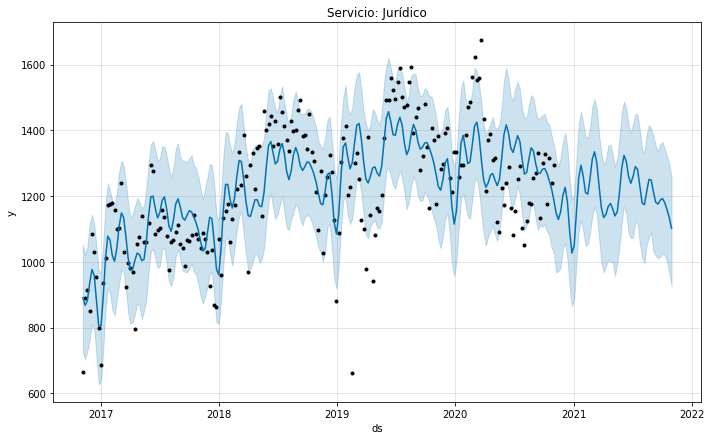

In [ ]:
# Gráfico del ajuste y pronóstico del modelo.
fig1 = PJuridico.plot(forecast)
plt.title('Servicio: Jurídico')

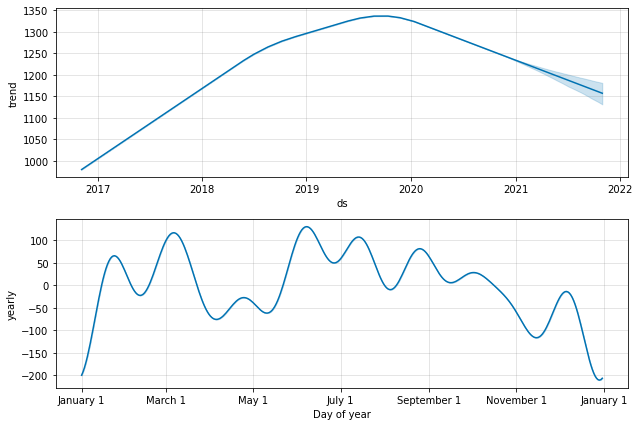

In [ ]:
# Gráfico de los componentes de tendencia y estacionalidad (anual, semanal)
fig2 = PJuridico.plot_components(forecast)

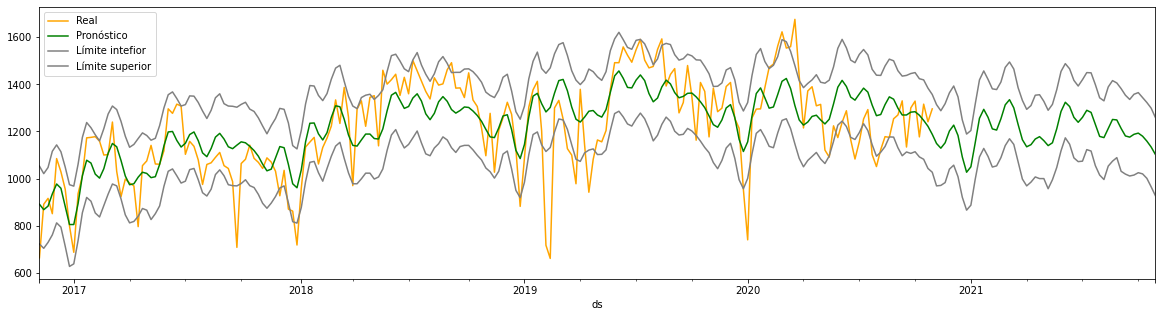

In [ ]:
forecast.set_index('ds', inplace = True)
plt.figure(figsize = (20, 5))
forecast['real'].plot(label = 'Real', color = 'orange')
forecast['yhat'].plot(label = 'Pronóstico', color = 'green')
forecast['yhat_lower'].plot(label = 'Límite intefior', color = 'gray')
forecast['yhat_upper'].plot(label = 'Límite superior', color = 'gray')
plt.legend(loc = 0)
plt.show()

A partir de las gráficas anteriores podemos apreciar que los días en los que se reciben menos llamadas son: domingo, sábado y viernes. En ese orden. 

Considerando la estacionalidad anual, los días con menos recepción de llamdas es a finales de diciembre, principios de enero. Por otro lado, en el mes de junio se presenta el punto más alto. 

#### Médico

In [ ]:
medico = serie_tiempo[serie_tiempo['SERVICIO'] == "MÉDICO"][['ds', 'LLAMADAS']]
# Generar una serie de tiempo sin saltos en la historia
medico = pd.merge(pd.DataFrame({'ds':pd.date_range(start = medico['ds'].min(), end = medico['ds'].max(), freq = 'W')}), medico, on = 'ds', how = 'left')
medico['LLAMADAS_IMP'] = hampel(medico['LLAMADAS'], window_size = 10)
print(medico.shape)
medico.tail()

(209, 3)


,ds,LLAMADAS,LLAMADAS_IMP
204,2020-10-04,476,476
205,2020-10-11,497,497
206,2020-10-18,513,513
207,2020-10-25,474,474
208,2020-11-01,428,428


In [ ]:
fig = px.line(medico, x = 'ds', y = 'LLAMADAS')
fig.add_scatter(x = medico['ds'], y = medico['LLAMADAS_IMP'])   
fig.show()

In [ ]:
medico = medico.rename(columns = {'LLAMADAS_IMP':'y'})
medico.tail()

,ds,LLAMADAS,y
204,2020-10-04,476,476
205,2020-10-11,497,497
206,2020-10-18,513,513
207,2020-10-25,474,474
208,2020-11-01,428,428


In [ ]:
# Instanciar el Modelo 
PMedico = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

# Entrenamiento
PMedico.fit(medico.drop(medico.tail(52).index))

# Test
future = PMedico.make_future_dataframe(periods = 52, freq = "W")
forecast = PMedico.predict(future)
# Redondeo del pronóstico
forecast['yhat'] = forecast['yhat'].round(0)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-10-04,584.0,487.0,681.0
205,2020-10-11,552.0,451.0,650.0
206,2020-10-18,514.0,426.0,605.0
207,2020-10-25,488.0,392.0,580.0
208,2020-11-01,481.0,390.0,567.0


In [ ]:
# evaluación del test
test = pd.merge(medico.tail(52), forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on = 'ds', how = 'left')
test['error'] = (test['yhat'] - test['LLAMADAS'])**2
test['error2'] = abs(test['LLAMADAS'] - test['yhat'])/abs(test['LLAMADAS'])
test.head()

,ds,LLAMADAS,y,yhat,yhat_lower,yhat_upper,error,error2
0,2019-11-10,545,545,449.0,356.0,543.0,9216.0,0.176147
1,2019-11-17,552,552,453.0,356.0,543.0,9801.0,0.179348
2,2019-11-24,551,551,448.0,354.0,541.0,10609.0,0.186933
3,2019-12-01,566,566,442.0,351.0,533.0,15376.0,0.219081
4,2019-12-08,548,548,441.0,343.0,534.0,11449.0,0.195255


In [ ]:
# Error cuadrático medio RMSE
test['error'].mean()**(1/2)

148.00266369744315

In [ ]:
test['LLAMADAS'].mean()

486.0

In [ ]:
# Cálculo del error porcentual absoluto medio MAPE
test['error2'].mean()*100

195.4324632982586

Para el periodo de teste tenemos un error aproximadamente del 195%.

In [ ]:
test[~test['ds'].isin(['2020-04-05', '2020-03-29', '2020-03-22'])]['error2'].mean()*100

20.61176379866762

Quitando el periodo en donde se presentó el problema de COVID, observamos que el mape es de 21%.

In [ ]:
fig = px.line(test, x = 'ds', y = 'LLAMADAS')
fig.add_scatter(x = test['ds'], y = test['yhat'])   
fig.show()

**Reentrenar el Modelo:**

In [ ]:
# Instanciar el Modelo
PMedico = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

# Reentrenamiento
PMedico.fit(medico)

# Pronóstico
future = PMedico.make_future_dataframe(periods = 52, freq = 'W')
forecast = PMedico.predict(future)
# Redondeo del pronóstico
forecast['yhat'] = forecast['yhat'].round(0)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0)

medico = medico.rename(columns = {'LLAMADAS': 'real'})
forecast = pd.merge(forecast, medico, on = 'ds', how = 'left')
forecast[['ds', 'real', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,real,yhat,yhat_lower,yhat_upper
256,2021-10-03,NaN,551.0,447.0,651.0
257,2021-10-10,NaN,530.0,438.0,635.0
258,2021-10-17,NaN,497.0,393.0,597.0
259,2021-10-24,NaN,472.0,369.0,570.0
260,2021-10-31,NaN,467.0,361.0,569.0


Text(0.5, 1.0, 'Servicio: Médico')

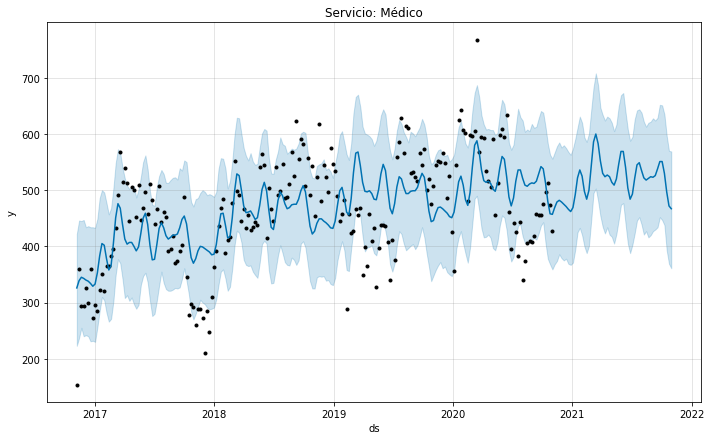

In [ ]:
# Gráfico del ajuste y pronóstico del modelo.
fig1 = PMedico.plot(forecast)
plt.title('Servicio: Médico')

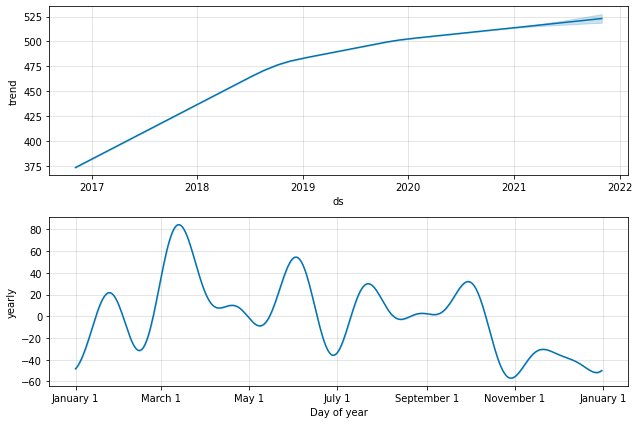

In [ ]:
# Gráfico de los componentes de tendencia y estacionalidad (anual, semanal)
fig2 = PMedico.plot_components(forecast)

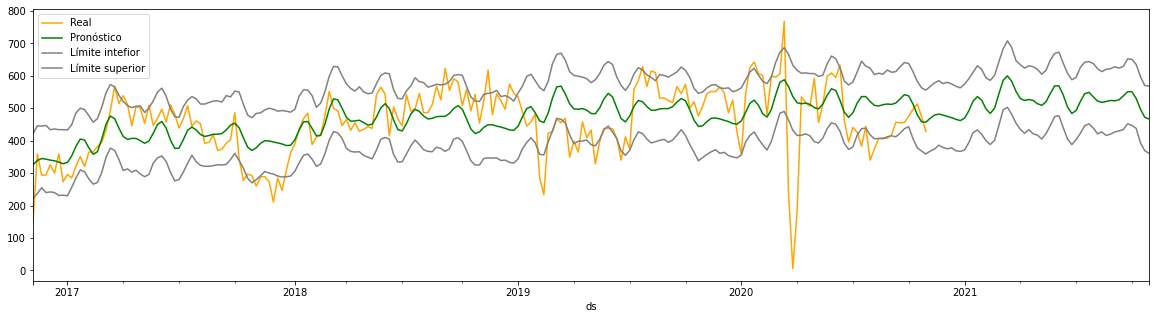

In [ ]:
forecast.set_index('ds', inplace = True)
plt.figure(figsize = (20, 5))
forecast['real'].plot(label = 'Real', color = 'orange')
forecast['yhat'].plot(label = 'Pronóstico', color = 'green')
forecast['yhat_lower'].plot(label = 'Límite intefior', color = 'gray')
forecast['yhat_upper'].plot(label = 'Límite superior', color = 'gray')
plt.legend(loc = 0)
plt.show()

#### Psicológico

In [ ]:
psicologico = serie_tiempo[serie_tiempo['SERVICIO'] == "PSICOLÓGICO"][['ds', 'LLAMADAS']]
# Generar una serie de tiempo sin saltos en la historia
psicologico = pd.merge(pd.DataFrame({'ds':pd.date_range(start = psicologico['ds'].min(), end = psicologico['ds'].max(), freq = 'W')}), psicologico, on = 'ds', how = 'left')
psicologico['LLAMADAS_IMP'] = hampel(psicologico['LLAMADAS'], window_size = 10)
print(psicologico.shape)
psicologico.tail()

(209, 3)


,ds,LLAMADAS,LLAMADAS_IMP
204,2020-10-04,1003,1003
205,2020-10-11,988,988
206,2020-10-18,1020,1020
207,2020-10-25,843,843
208,2020-11-01,897,897


In [ ]:
fig = px.line(psicologico, x = 'ds', y = 'LLAMADAS')
fig.add_scatter(x = psicologico['ds'], y = psicologico['LLAMADAS_IMP'])   
fig.show()

In [ ]:
psicologico = psicologico.rename(columns = {'LLAMADAS_IMP':'y'})
psicologico.tail()

,ds,LLAMADAS,y
204,2020-10-04,1003,1003
205,2020-10-11,988,988
206,2020-10-18,1020,1020
207,2020-10-25,843,843
208,2020-11-01,897,897


In [ ]:
# Instanciar el Modelo 
PPsicologico = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

# Entrenamiento
PPsicologico.fit(psicologico.drop(psicologico.tail(52).index))

# Test
future = PPsicologico.make_future_dataframe(periods = 52, freq = 'W')
forecast = PPsicologico.predict(future)
# Redondeo del pronóstico
forecast['yhat'] = forecast['yhat'].round(0)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-10-04,742.0,612.0,884.0
205,2020-10-11,736.0,601.0,868.0
206,2020-10-18,733.0,606.0,875.0
207,2020-10-25,740.0,598.0,884.0
208,2020-11-01,759.0,607.0,889.0


In [ ]:
# evaluación del test
test = pd.merge(psicologico.tail(52), forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on = 'ds', how = 'left')
test['error'] = (test['yhat'] - test['LLAMADAS'])**2
test['error2'] = abs(test['LLAMADAS'] - test['yhat'])/abs(test['LLAMADAS'])
test.head()

,ds,LLAMADAS,y,yhat,yhat_lower,yhat_upper,error,error2
0,2019-11-10,781,781,857.0,736.0,975.0,5776.0,0.097311
1,2019-11-17,767,767,849.0,722.0,972.0,6724.0,0.106910
2,2019-11-24,712,712,822.0,704.0,943.0,12100.0,0.154494
3,2019-12-01,824,824,792.0,664.0,912.0,1024.0,0.038835
4,2019-12-08,755,755,768.0,643.0,887.0,169.0,0.017219


In [ ]:
# Error cuadrático medio RMSE
test['error'].mean()**(1/2)

171.58010015509015

In [ ]:
test['y'].mean()

885.9615384615385

In [ ]:
# Cálculo del error porcentual absoluto medio MAPE
test['error2'].mean()*100

15.634990563596526

Para el periodo de teste tenemos un error aproximadamente del 16%.

In [ ]:
fig = px.line(test, x = 'ds', y = 'LLAMADAS')
fig.add_scatter(x = test['ds'], y = test['yhat'])   
fig.show()

**Reentrenar el Modelo:**



In [ ]:
# Instanciar el Modelo
PPsicologico = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

# Reentrenamiento
PPsicologico.fit(psicologico)

# Pronóstico
future = PPsicologico.make_future_dataframe(periods = 52, freq = "W")
forecast = PPsicologico.predict(future)
# Redondeo del pronóstico
forecast['yhat'] = forecast['yhat'].round(0)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0)

psicologico = psicologico.rename(columns = {'LLAMADAS': 'real'})
forecast = pd.merge(forecast, psicologico, on = 'ds', how = 'left')
forecast[['ds', 'real', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,real,yhat,yhat_lower,yhat_upper
256,2021-10-03,NaN,931.0,792.0,1076.0
257,2021-10-10,NaN,928.0,785.0,1068.0
258,2021-10-17,NaN,920.0,782.0,1069.0
259,2021-10-24,NaN,915.0,766.0,1048.0
260,2021-10-31,NaN,919.0,779.0,1052.0


Text(0.5, 1.0, 'Servicio: Psicológico')

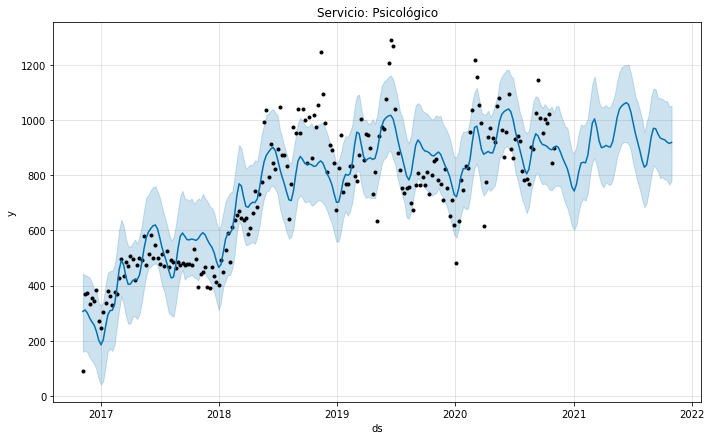

In [ ]:
# Gráfico del ajuste y pronóstico del modelo.
fig1 = PPsicologico.plot(forecast)
plt.title('Servicio: Psicológico')

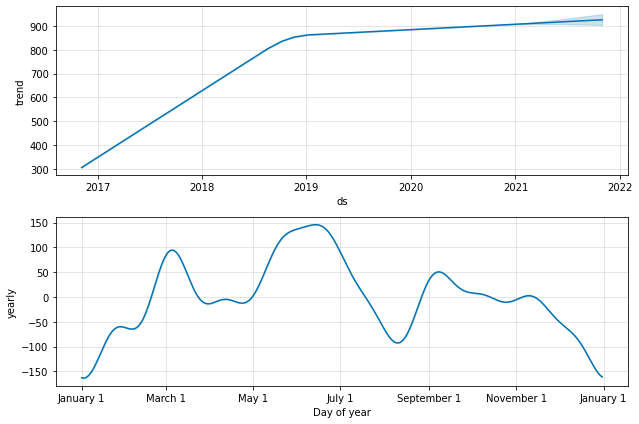

In [ ]:
# Gráfico de los componentes de tendencia y estacionalidad (anual, semanal)
fig2 = PPsicologico.plot_components(forecast)

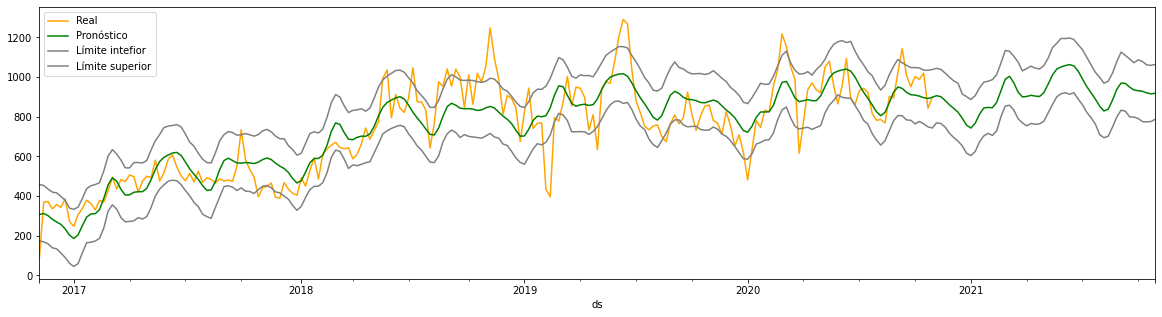

In [ ]:
forecast.set_index('ds', inplace = True)
plt.figure(figsize = (20, 5))
forecast['real'].plot(label = 'Real', color = 'orange')
forecast['yhat'].plot(label = 'Pronóstico', color = 'green')
forecast['yhat_lower'].plot(label = 'Límite intefior', color = 'gray')
forecast['yhat_upper'].plot(label = 'Límite superior', color = 'gray')
plt.legend(loc = 0)
plt.show()

### Función Automatizada


In [ ]:
class Pronostico_LineaMujeres:
    def __init__(self, df):
        self.df = df.copy() # Tabla de datos
    
    def hampel(self, window_size, n_sigma = 3):
        n = self.df.shape[0]
        data = self.df.copy()
        index = []
        for i in range(window_size, (n - window_size)):
          x = np.median(self.dfdf[(i - window_size) : (i + window_size)])
          s = (1.4826)*np.median(np.abs(self.dfdf[(i - window_size) : (i + window_size)] - x))
          if np.abs(self.dfdf[i]-x) > n_sigma*s:
            data[i] = x
            index.append(i)
        return data
    
    def creacion_tad(self, periodo_test):
        # Formato de texto para el FOLIO.
        self.df['FOLIO'] = self.df['FOLIO'].astype('int').astype('str')
        
        # Transformar la columna de FECHA_ALTA en formato fecha.
        self.df['FECHA_ALTA'] = pd.to_datetime(self.df['FECHA_ALTA'])
        # Obtener la semana de la fecha.
        self.df.insert(3, "SEMANA_ALTA", self.df['FECHA_ALTA'].dt.isocalendar().week , True)
        self.df.insert(3, "FECHA", pd.to_datetime(self.df.SEMANA_ALTA.astype(str) + self.df.AÑO_ALTA.astype(str).add('-7'), format = "%V%G-%u") , True)

        # Se obtienen la cantidad de llamadas de forma semanal. 
        serie_tiempo = self.df[['FOLIO', 'FECHA', 'AÑO_ALTA', 'SEMANA_ALTA', 'SERVICIO']].groupby(['FECHA', 'AÑO_ALTA', 'SEMANA_ALTA', 'SERVICIO']).count().reset_index()
        serie_tiempo['FECHA'] = pd.to_datetime(serie_tiempo['FECHA'] )
        serie_tiempo = serie_tiempo.rename(columns = {'FOLIO':'LLAMADAS'})

        # Generar una serie de tiempo sin saltos en la historia
        serie_tiempo = pd.merge(pd.DataFrame({'FECHA':pd.date_range(start = serie_tiempo['FECHA'].min(), end = serie_tiempo['FECHA'].max(), freq = 'W')}), serie_tiempo, on = 'FECHA', how = 'left')
        serie_tiempo['LLAMADAS_IMP'] = hampel(serie_tiempo['LLAMADAS'], window_size = 10)

        # Se renombran las columnas para ingresar al modelo de Prophet
        serie_tiempo = serie_tiempo.rename(columns = {'FECHA':'ds', 'LLAMADAS_IMP':'y'})

        print('---- Perdiodo de Test ----      Entrenando el modelo')
        # Instanciar el Modelo 
        Modelo_Prophet = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

        # Entrenamiento
        Modelo_Prophet.fit(serie_tiempo.drop(serie_tiempo.tail(periodo_test).index))

        # Test
        future = Modelo_Prophet.make_future_dataframe(periods = periodo_test, freq = "W")
        forecast = Modelo_Prophet.predict(future)
        # Redondeo del pronóstico
        forecast['yhat'] = forecast['yhat'].round(0)
        forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
        forecast['yhat_upper'] = forecast['yhat_upper'].round(0)

        # evaluación del test
        test = pd.merge(serie_tiempo.tail(periodo_test), forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on = 'ds', how = 'left')
        test['error'] = abs(test['LLAMADAS'] - test['yhat'])/abs(test['LLAMADAS'])
        print('           En el periodo de evaluación, que considera {} periodos, se presenta un MAPE de {}%'.format(periodo_test, round(test['error'].mean()*100)))
        print('Recuerda que los datos atípicos pueden impactar en la métrica de error (MAPE)')

        # Reentrenar el modelo 
        print('---- Perdiodo de Pronóstio ----      Reentrenando el modelo')
        # Instanciar el Modelo
        Modelo_Prophet = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True)

        # Reentrenamiento
        Modelo_Prophet.fit(serie_tiempo)

        # Pronóstico
        future = Modelo_Prophet.make_future_dataframe(periods = periodo_test, freq = "W")
        forecast = Modelo_Prophet.predict(future)
        # Redondeo del pronóstico
        forecast['yhat'] = forecast['yhat'].round(0)
        forecast['yhat_lower'] = forecast['yhat_lower'].round(0)
        forecast['yhat_upper'] = forecast['yhat_upper'].round(0)
        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

        serie_tiempo = serie_tiempo.rename(columns = {'LLAMADAS': 'real'})
        forecast = pd.merge(forecast, serie_tiempo, on = 'ds', how = 'left')
        
        # Gráficas de los resultados
        print('Gráfica 1: Ajuste del modelo:')
        fig1 = Modelo_Prophet.plot(forecast)
        print('Gráfica 2: Componenetes de la serie de tiempo:')
        fig2 = Modelo_Prophet.plot_components(forecast)

        return forecast[['ds', 'real', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
linea = pd.read_csv('linea-mujeres-1116-021120.csv', encoding='latin')

---- Perdiodo de Test ----      Entrenando el modelo
           En el periodo de evaluación, que considera 52 periodos, se presenta un mape de 17%
---- Perdiodo de Pronóstio ----      Reentrenando el modelo
Gráfica 1: Ajuste del modelo:
Gráfica 2: Componenetes de la serie de tiempo:


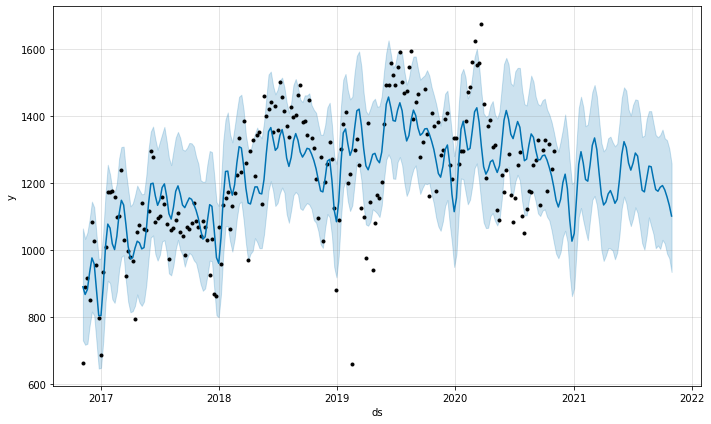

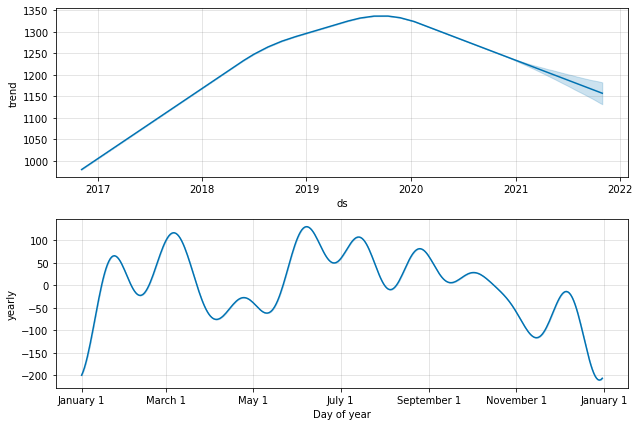

In [ ]:
x = Pronostico_LineaMujeres(linea[linea['SERVICIO'] == 'JURÍDICO'])
modelo_juridico = x.creacion_tad(periodo_test = 52)

In [ ]:
modelo_juridico

,ds,real,yhat,yhat_lower,yhat_upper
0,2016-11-06,664.0,891.0,731.0,1065.0
1,2016-11-13,891.0,868.0,718.0,1034.0
2,2016-11-20,916.0,883.0,721.0,1053.0
3,2016-11-27,851.0,935.0,776.0,1093.0
4,2016-12-04,1085.0,977.0,817.0,1145.0
...,...,...,...,...,...
256,2021-10-03,NaN,1193.0,1031.0,1360.0
257,2021-10-10,NaN,1180.0,1020.0,1334.0
258,2021-10-17,NaN,1159.0,990.0,1328.0
259,2021-10-24,NaN,1134.0,976.0,1303.0
